# A/B тест

# ОПИСАНИЕ ДАННЫХ

# Описание hypothesis:

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


# ОПИСАНИЕ orders:

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

# Описание visitors:

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Часть 1.

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

# Часть 2. 

Проанализирем A/B-тест:

Построим график кумулятивной выручки по группам.

Построим график кумулятивного среднего чека по группам. 

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Построим график кумулятивной конверсии по группам. 

Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

Построим точечный график количества заказов по пользователям.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

Построим точечный график стоимостей заказов. 

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Примем решение по результатам теста.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import math


In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format


In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [4]:
pd.set_option('display.max_colwidth', 0)

In [5]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [6]:
hypothesis.duplicated().sum()

0

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.duplicated().sum()

0

In [9]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.duplicated().sum()

0

In [11]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [12]:
orders['transactionId'].duplicated().sum()

0

In [13]:
orders['transactionId'].count()

1197

In [14]:
orders[orders['group'] == 'A']['transactionId'].count()

557

In [15]:
orders[orders['group'] == 'B']['transactionId'].count()

640

In [16]:
orders['visitorId'].duplicated().sum()

166

In [17]:
orders[orders['group'] == 'A']['visitorId'].nunique()

503

In [18]:
orders[orders['group'] == 'A']['visitorId'].duplicated().sum()

54

In [19]:
orders[(orders['group'] == 'A') & (orders['group'] == 'B')]['visitorId'].duplicated().sum()

0

In [20]:
orders[orders['group'] == 'B']['visitorId'].nunique()

586

In [21]:
orders[orders['group'] == 'B']['visitorId'].duplicated().sum()

54

В группе B, заказов больше чем в группе А, разница в 83 заказа, не малая!Дубликаатов по заказам, пользователей так же больше в группе B на 83, есть 166 дубликатов среди пользователей,и по 54 в каждой группе, но это не меняет факт того,что в группе B все также остается на 83 пользователя больше!

# Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [22]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [23]:
hypothesis.sort_values('ICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00


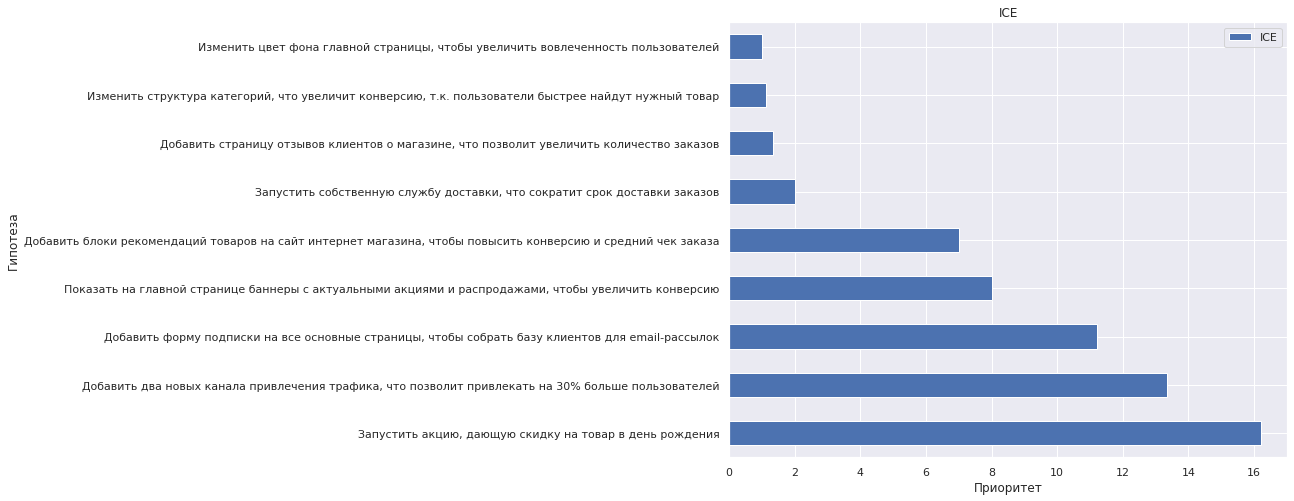

In [24]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=False).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

# Применим фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

In [25]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']/ hypothesis['Efforts']

In [26]:
hypothesis.sort_values('RICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


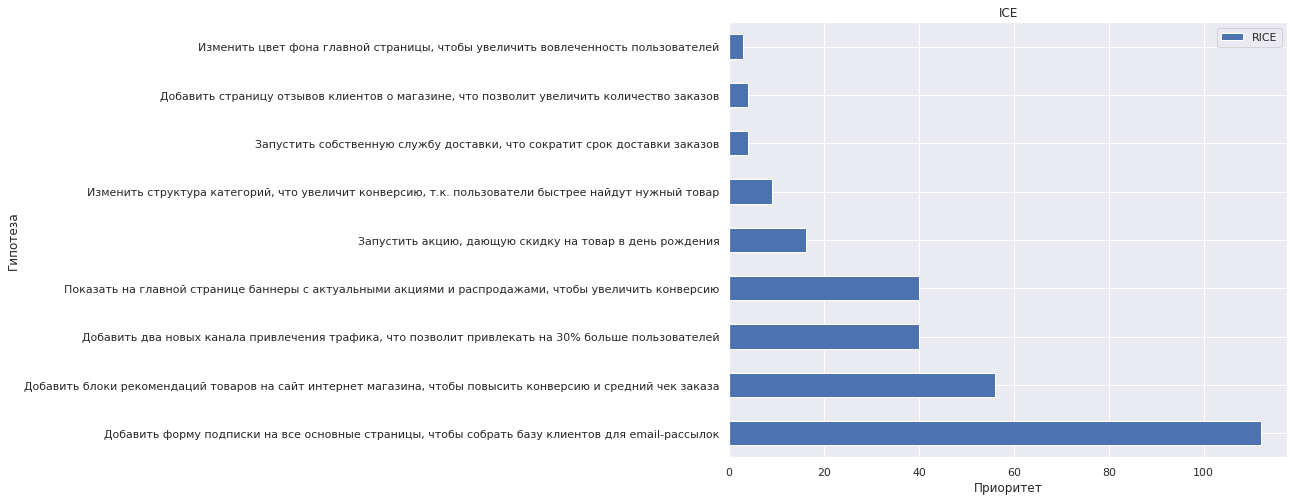

In [27]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=False).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

# Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [28]:
hypothesis.sort_values('ICE', ascending=False).head()


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00


In [29]:
hypothesis.sort_values('RICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


Такой результат у нас получился, так как формулы разные, одна учитывает охват, а другая нет

In [30]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [31]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [32]:
orders.rename(columns={'transactionId':'transactionid','visitorId':'visitirid'}, inplace=True)

In [33]:
orders_grouped = (orders.groupby(['date', 'group'], as_index=False)
                 .agg({'transactionid':'nunique','visitirid':'nunique','revenue':'sum'}))\
                 .rename(columns={'transactionid':'orders','visitirid':'buyers'})


In [34]:
orders_grouped['group_copy'] = orders_grouped['group']  
orders_grouped = orders_grouped.set_index(['date', 'group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [35]:
#посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date', 'group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date', 'group'])
#скопируем group что бы провести по ней кумулятивную сумму 
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()
                                                                                                          

In [36]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [37]:
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [38]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,"6,190.79",0.03
1,2019-08-01,B,21,20,101217,713,"4,819.86",0.03
2,2019-08-02,A,44,39,242401,1338,"5,509.11",0.03
3,2019-08-02,B,45,43,266748,1294,"5,927.73",0.03
4,2019-08-03,A,68,63,354874,1845,"5,218.74",0.04


# Построим график кумулятивной выручки по группам. 

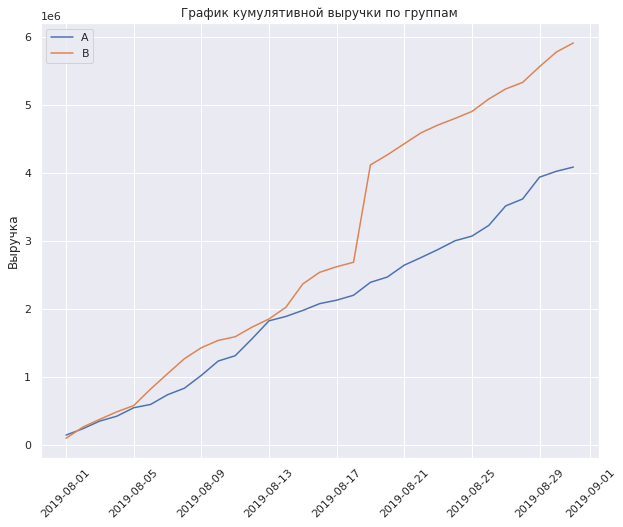

In [39]:
cummulativeA = cummulative[cummulative['group'] == 'A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group'] == 'B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A')
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend()

plt.show()

В середине теста сегмент В вырвался вперед и прожолжает лидировать весь остаток теста, аномально большие заказы видимо влияют на результаты

# Построим график кумулятивного среднего чека по группам. 

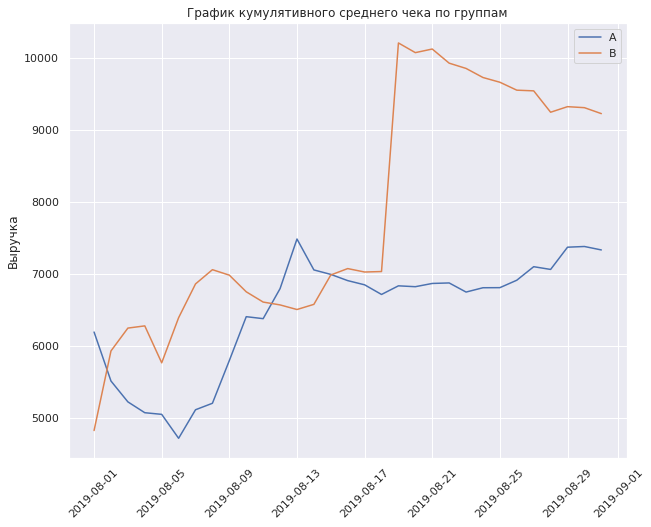

In [40]:
cummulativeA = cummulative[cummulative['group'] == 'A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group'] == 'B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A')
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend()

plt.show()

Кумулятивные значения среднего чека по сегментам так же продолжают колебаться, скорее всего нам нужен дополнительный анализ выбросов

# Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

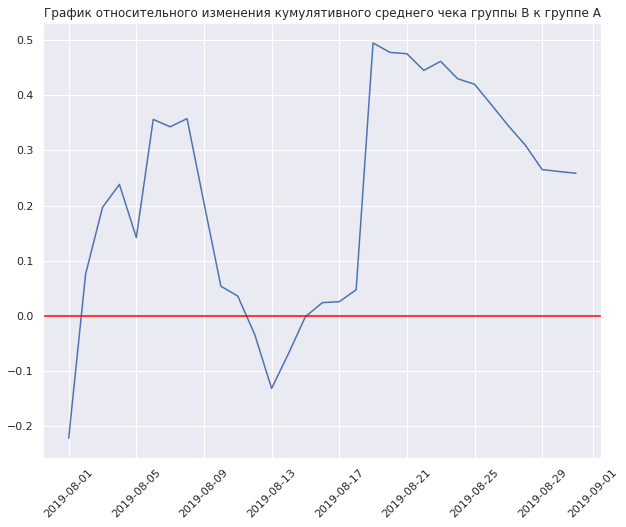

In [41]:
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']],
                                                     left_on='date',right_on= 'date', how='left', suffixes=['_A','_B']))
plt.plot(temp['date'],temp['average_check_B'] / temp['average_check_A'] - 1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе А')
plt.axhline(y=0, color = 'red', linestyle = '-')
plt.xticks(rotation=45)
plt.show()



Результаты теста значительно и резко менялись в некоторые даты, видимо тогда были совершены аномальные заказы

# Построим график кумулятивной конверсии по группам.

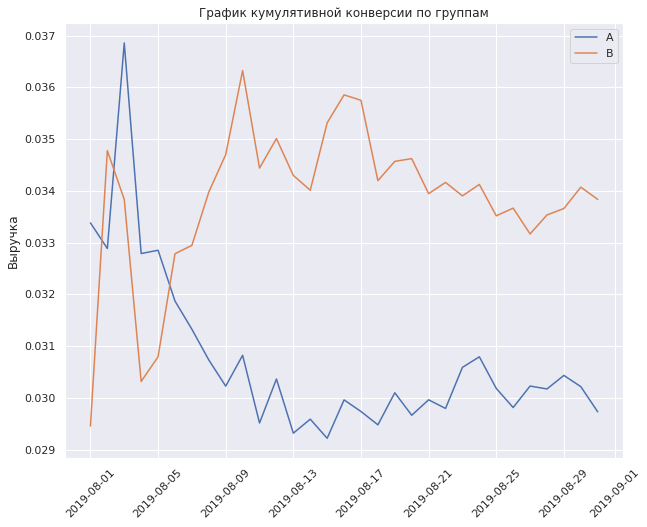

In [42]:
cummulativeA = cummulative[cummulative['group'] == 'A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group'] == 'B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A')
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend()

plt.show()

На данном этапе конверсия B выглядит намного лучше

# Построим график относительного изменения кумулятивной конверсии группы B к группе A.

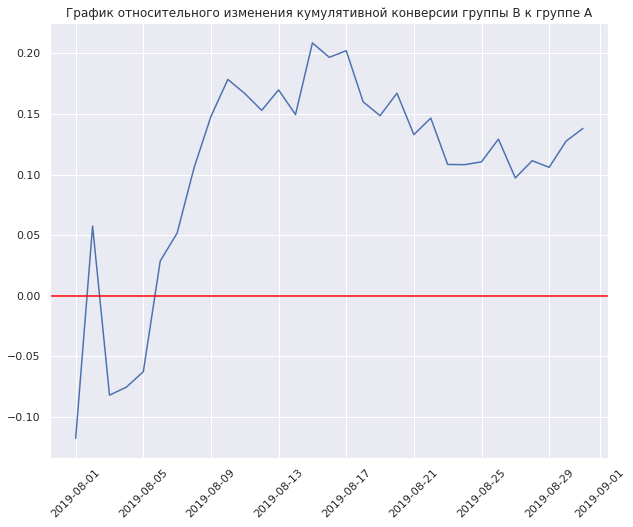

In [43]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']],
                                                     left_on='date',right_on= 'date', how='left', suffixes=['_A','_B']))
plt.plot(temp['date'],temp['conversion_B'] / temp['conversion_A'] - 1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе А')
plt.axhline(y=0, color = 'red', linestyle = '-')
plt.xticks(rotation=45)
plt.show()

Почти с самого начала теста конверсия группы B лидирует по конверсии

# Построим точечный график количества заказов по пользователям.

In [44]:
orders_per_user = orders.groupby('visitirid', as_index=False).agg({'transactionid':'nunique'})\
                        .rename(columns={'transactionid':'orders'})

In [45]:
orders_per_user.head()

,visitirid,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


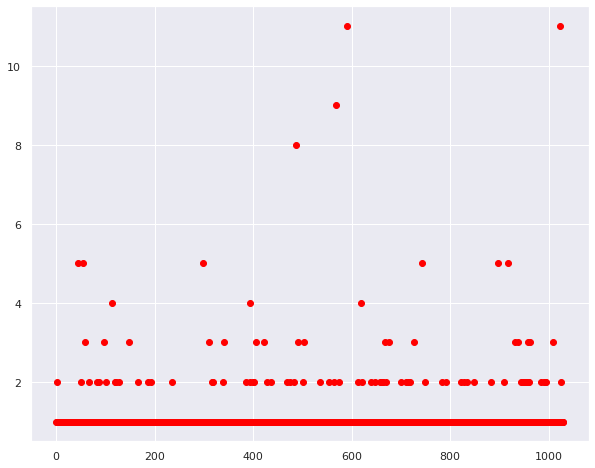

In [46]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'],color='red')
plt.show()

В основном покупают один раз, не малое количество тех, кто заказывает 2 раза, так же есть пользователи которые заказыват 11 раз

# Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [47]:
print('90 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'],[90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'],[95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'],[99])))

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


In [48]:
orders_per_user['orders'].max()

11

In [49]:
outlaws_1p = orders_per_user[orders_per_user['orders'] >= 4]['visitirid'].to_list()

Все, что за 99 перцентилем - аномально.


# Построим точечный график стоимостей заказов.

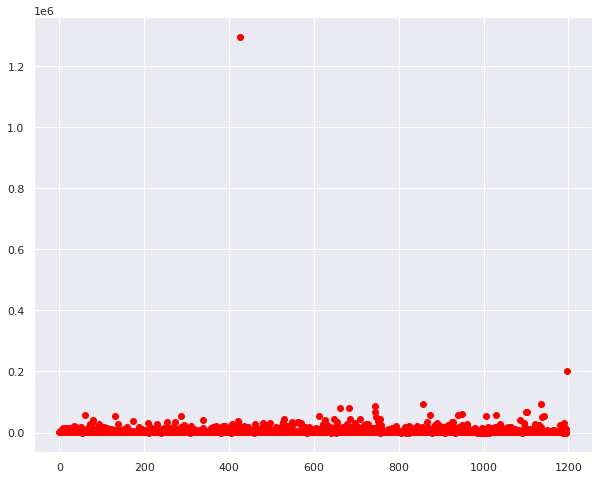

In [50]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'],color='red')
plt.show()

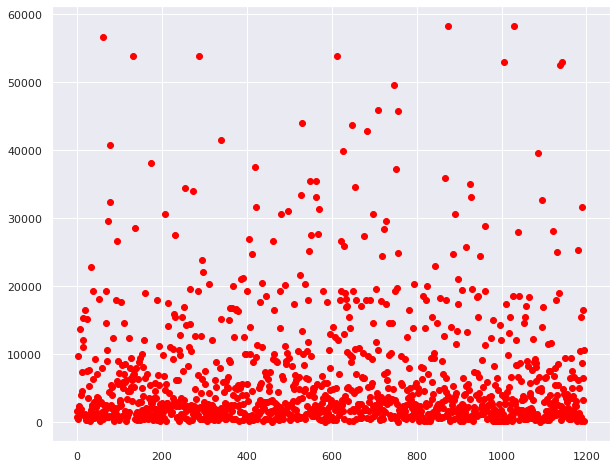

In [51]:
orders['rev'] = orders[orders['revenue'] <= 58233]['revenue']
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['rev'],color='red')
plt.show()

Есть 2 выброса.Если посмотреть на график без выбросов, то он плавно после скопления у 3-4 тыс., начинает рассеиваться, после 20000 заказов совсем не много

# Посчитаем 95-й и 99-й перцентили стоимости заказов.Выберем границу для определения аномальных заказов.

In [52]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'],[90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'],[95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'],[99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


In [53]:
orders['revenue'].max()

1294500

In [54]:
np.ptp(orders['revenue'],axis = 0)

1294450

Все, что за 99 перцентилем - аномально

In [55]:
conversion = (orders.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid': 'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']

In [56]:
conversion

,group,orders,visitors,conversion
0,A,557,18736,0.03
1,B,640,18916,0.03


In [57]:
conversion['for_fun'] = conversion['conversion'] * 100
conversion

,group,orders,visitors,conversion,for_fun
0,A,557,18736,0.03,2.97
1,B,640,18916,0.03,3.38


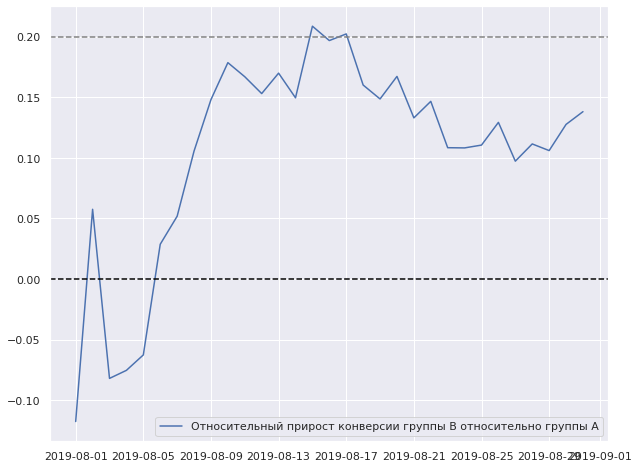

In [58]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitirid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

In [59]:
# Воспользуемся критерием Манна-Уитни
# H0: Pазличия в конверсии между группами есть
# H1: Pазличий в конверсии между группами нет
alpha = 0.05
results = st.mannwhitneyu(conversion[conversion['group']=='A']['conversion'], conversion[conversion['group']=='B']['conversion'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  1.0
Не получилось отвергнуть H0: вывод о различии сделать нельзя


Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [60]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']



In [61]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [62]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitirid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [63]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitirid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [64]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

названия столбцов данных:

date — дата;

ordersPerDateA — количество заказов в выбранную дату в группе A;

revenuePerDateA — суммарная выручка в выбранную дату в группе A;

ordersPerDateB — количество заказов в выбранную дату в группе B;

revenuePerDateB — суммарная выручка в выбранную дату в группе B;

ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;

revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;

ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;

revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;

visitorsPerDateA — количество пользователей в выбранную дату в группе A;

visitorsPerDateB — количество пользователей в выбранную дату в группе B;

visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;

visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.


In [65]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitirid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitirid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [66]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [67]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [68]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitirid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitirid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Вывод: По «сырым» данным различия в среднем числе заказов группы A и B есть.
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Выигрыш группы B равен 0.138 — второе число в выводе.
Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами:

In [69]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно ниже среднего чека группы A.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 20 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [70]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitirid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295 
949     887908475 
744     888512513 
1103    1164614297
1136    1307669133
dtype: int64
15


Всего 15 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [71]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [72]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.153


Результаты по среднему количеству заказов по очищенным данным практически не изменились.
Вывод: По очищенным данным различия в среднем числе заказов группы A и B есть.
Первое число — p-value = 0.014 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Выигрыш группы B равен 0.153 — второе число в выводе.

In [73]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitirid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitirid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitirid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitirid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.851
-0.006


P-value увеличился и разница между сегментами тоже.
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно ниже среднего чека группы A.

# Pешение по результатам теста

Имеющиеся факты:

Есть статистически значимые различия по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий, группа Б лидирует;

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

График различия конверсии между группами сообщает, что результаты группы B лучше группы A;

График различия среднего чека говорит о том, что результаты группы B лучше группы А;

Количество пользователей в группе B значительно превышает группу А;

Исходя из обнаруженных фактов, тест следует остановить и признать победителем сегмент B. Продолжать смысла нет, так как в среднем чеке нет различия,но из-за того,что на 83 заказа и на 83 пользователя в группе B больше
, конверсия у нее лучше, среднее количество заказов по этому у них больше, либо для достоверности стоит собрать одинаковое количество человек по группам и тогда провести еще тест!